In [1]:
from rich.jupyter import print
from rich.markdown import Markdown

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

def get_files(dir_path):
    file_list = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for entry in file_list:
        # Create full path
        full_path = os.path.join(dir_path, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_files(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

# Function for getting latency files:
def get_latency_files(type):
    return [file for file in get_files("data") if type in file and "clean_pub_0" in file]

def plot_mean_line(df, index):
    mean_value = df.mean()
    axes[index].hlines(mean_value, 0, len(df.index), color="red")
    axes[index].text(len(df.index) * 0.4, mean_value, "Mean: " + str(int(mean_value)),  color="white", backgroundcolor="red", fontsize=15)

def plot_min_value(df, index):
    min_value = df.min()
    axes[index].hlines(min_value, 0, len(df.index), color="red")
    axes[index].text(len(df.index) * 0.1, min_value, "Min: " + str(int(min_value)), color="white", backgroundcolor="red", fontsize=15)
    
def plot_max_value(df, index):
    max_value = df.max()
    axes[index].hlines(max_value, 0, len(df.index), color="red")
    axes[index].text(len(df.index) * 0.7, max_value, "Max: " + str(int(max_value)), color="white", backgroundcolor="red", fontsize=15)
    
# Function for plotting graph:
def plot_graph(df, index):
    axes[index].plot(df)
    axes[index].set_yscale("log")
    axes[index].set_ylabel("Latency ($\mu$s)", fontsize=15)
    plot_mean_line(df, index)
    plot_min_value(df, index)
    plot_max_value(df, index)
#   Add title to column if its top graph:
    if index[1] == 0:
        axes[index].set_title("Unicast Run " + str(index[0] + 1), fontsize=15)
    else:  
        axes[index].set_title("Multicast Run " + str(index[0] + 1), fontsize=15)

def plot_quantile(df, index, quantile):
    quantile_percent = '{:.0%}'.format(quantile)
    quantile_value = int(df.quantile(quantile))
    axes[index].text(quantile_value, df.max() * quantile, str(quantile_percent) + ": " + str(quantile_value), color="black", backgroundcolor="white", fontsize=14)
        
def plot_cdf(df, index):
    axes[index].hist(df, cumulative=True, histtype="stepfilled", bins=len(df.index))
    axes[index].set_yscale("log")
    axes[index].set_xlabel("Latency ($\mu$s)", fontsize=15)
    axes[index].set_ylabel("Percentile", fontsize=15)
#     plot_quantile(df, index, 0.5)
    plot_quantile(df, index, 0.9)

# Set 1 Rerun Analysis
Visualising the data for Set 1: Base Case Unicast vs Multicast.

## Quick Summary:
There are 4 sets of tests:
1. Base Case
2. Participant Measure
3. Denial of Service
4. Data Access

These were the parameters used in Set 1: Base Case:

Parameter     | Values  
---|---
Publishers    | 3
Subscriber    | 3
Data Length   | 100B
Test Duration | 900 sec 
Latency Count | 1000
Reliability   | Reliable
Communication | `Unicast` `Multicast` 

## Unicast versus Multicast Latency

IndexError: index 3 is out of bounds for axis 0 with size 3

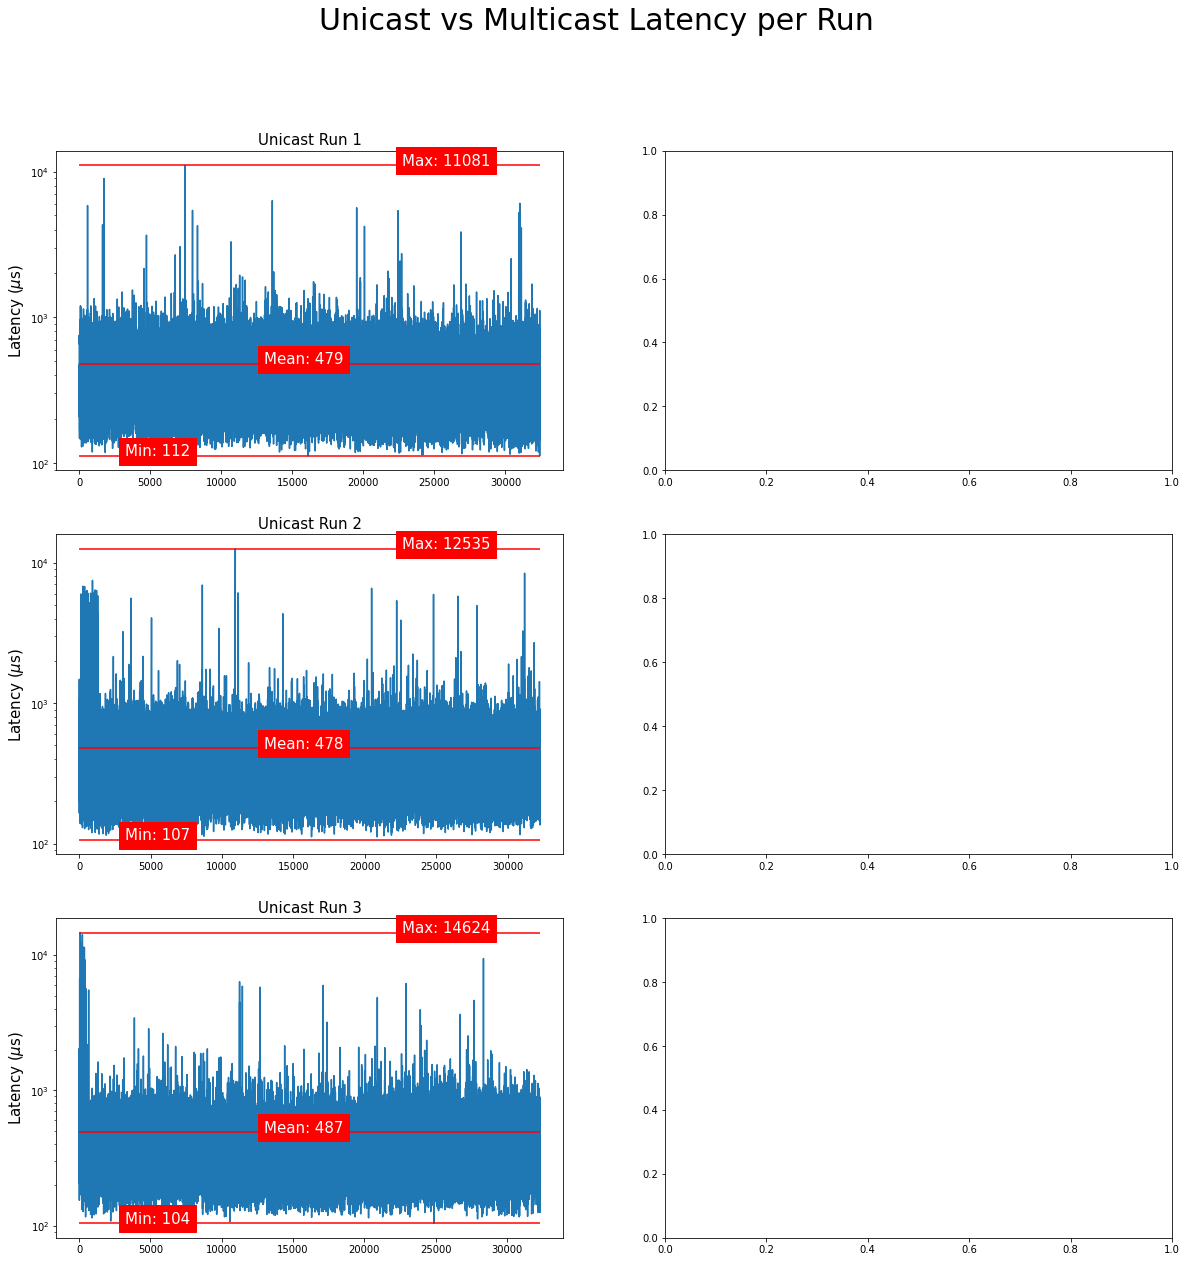

In [2]:
# Get all unicast/multicast latency files:
u_lat_files = get_latency_files("unicast")
m_lat_files = get_latency_files("multicast")

# Plot latency graphs:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
figure.suptitle("Unicast vs Multicast Latency per Run", fontsize=30)

for file in u_lat_files:
    y = u_lat_files.index(file)
    plot_graph(pd.read_csv(file)["Latency"], (y,0))
    
for file in m_lat_files:
    y = m_lat_files.index(file)
    plot_graph(pd.read_csv(file)["Latency"], (y,1))

# Plot latency CDFs:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
figure.suptitle("Unicast vs Multicast Latency CDF per Run", fontsize=30)
    
for file in u_lat_files:
    y = u_lat_files.index(file)
    plot_cdf(pd.read_csv(file)["Latency"], (y, 0))
    
for file in m_lat_files:
    y = m_lat_files.index(file)
    plot_cdf(pd.read_csv(file)["Latency"], (y, 1))
    
plt.tight_layout(pad=5)

## Unicast vs Multicast Throughput

In [ ]:
def get_throughput_files(type):
    return [file for file in get_files("data") if "clean_sub" in file and type in file]

def plot_tp_graphs(df, index):
#     Removing first 100 measurements using [100:]
    axes[index].plot(df[100:])
    axes[index].set_ylabel("Throughput (Mbps)", fontsize=15)
    axes[index].set_xlabel("Experiment Duration (s)", fontsize=15)
    if index[1] == 0:
        type = "Unicast"
    else:
        type = "Multicast"
    axes[index].set_title(type + " Run " + str(index[0] + 1))
#     Starting x-axis from 100th second - because of skipping first 100 measurements
    axes[index].set_xlim((100, len(df.index)))
    plot_mean_line(df, index)
    plot_max_value(df, index)

u_tp_files = get_throughput_files("unicast")
m_tp_files = get_throughput_files("multicast")

tp_graph_figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for file in u_tp_files:
    if "run_1" in file:
        run = 0
    elif "run_2" in file:
        run = 1
    else:
        run = 2
    plot_tp_graphs(pd.read_csv(file)["Throughput"], (run, 0))
    
for file in m_tp_files:
    if "run_1" in file:
        run = 0
    elif "run_2" in file:
        run = 1
    else:
        run = 2
    plot_tp_graphs(pd.read_csv(file)["Throughput"], (run, 1))

tp_graph_figure.suptitle("Unicast vs Multicast Throughput per Run", fontsize=30)
tp_graph_figure.tight_layout(pad=3)

def plot_tp_cdfs(df, index):
    axes[index].hist(df, bins=len(df.index), cumulative=True, color="b")
    axes[index].set_xlabel("Throughput (Mbps)")
    axes[index].set_ylabel("Percentile")
    if index[1] == 0:
        type = "Unicast"
    else:
        type = "Multicast"
    axes[index].set_title(type + " Run " + str(index[0] + 1))
#     plot_quantile(df, index, 0.5)
    plot_quantile(df, index, 0.9)

cdf_figures, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for file in u_tp_files:
    if "run_1" in file:
        run = 0
    elif "run_2" in file:
        run = 1
    else:
        run = 2
    plot_tp_cdfs(pd.read_csv(file)["Throughput"], (run, 0))
    
for file in m_tp_files:
    if "run_1" in file:
        run = 0
    elif "run_2" in file:
        run = 1
    else:
        run = 2
    plot_tp_cdfs(pd.read_csv(file)["Throughput"], (run, 1))
    
cdf_figures.suptitle("Unicast vs Multicsat Throughput CDF per Run", fontsize=30)
cdf_figures.tight_layout(pad=3)

## Plotting Unicast vs Multicast on a Scatter

In [ ]:
def get_best_fit_coords(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    return slope, intercept

def plot_scatters(type_one, type_two, variable):
    type_one_files = [file for file in get_files("data") if "clean_" in file and type_one in file]
    type_two_files = [file for file in get_files("data") if "clean_" in file and type_two in file]
#     Get how many runs there are per type
    type_one_run_amount = len([file for file in type_one_files if "pub_0" in file])
    type_two_run_amount = len([file for file in type_two_files if "pub_0" in file])
#     Make sure the runs are the same amount
    if type_one_run_amount == type_two_run_amount:
        figure, axes = plt.subplots(ncols=type_one_run_amount, nrows=1, figsize=(15,5.5))
    else:
        raise Exception("The number of runs in " + type_one + " and " + type_two + " do NOT match.")
    
    if "latency" in variable:
        t1_files = [file for file in type_one_files if "pub_0" in file]
        t2_files = [file for file in type_two_files if "pub_0" in file]
        
        for i in range(type_one_run_amount):
            run = i + 1
            t1_df = pd.read_csv(t1_files[i])["Latency"]
            t2_df = pd.read_csv(t2_files[i])["Latency"]
            
            axes[i].set_title(type_one.capitalize() + " against " + type_two.capitalize() + " Run " + str(run))
            axes[i].set_xlabel(type_one.capitalize() + " Latency ($\mu$s)")
            axes[i].set_ylabel(type_two.capitalize() + " Latency ($\mu$s)")
            axes[i].set_yscale("log")
            axes[i].set_xscale("log")
            
            if len(t1_df.index) > len(t2_df.index):
                axes[i].scatter(t1_df[0:len(t2_df)], t2_df, s=5)
                slope, intercept = get_best_fit_coords(t1_df[0:len(t2_df)], t2_df)
                x = t1_df[0:len(t2_df)]
                y = t2_df
                axes[i].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="red")
            else:
                axes[i].scatter(t1_df, t2_df[0:len(t1_df)], s=5)
                slope, intercept = get_best_fit_coords(t1_df, t2_df[0:len(t1_df)])
                x = t1_df
                y = t2_df[0:len(t2_df)]
                axes[i].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="red")
            
            
    elif "throughput" in variable:
        t1_files = [file for file in type_one_files if "sub" in file]
        t2_files = [file for file in type_two_files if "sub" in file]
        
        for i in range(type_one_run_amount):
            run = i + 1
            t1_df = pd.read_csv(t1_files[i])["Throughput"]
            t2_df = pd.read_csv(t2_files[i])["Throughput"]
            
            axes[i].set_title(type_one.capitalize() + " against " + type_two.capitalize() + " Run " + str(run))
            axes[i].set_xlabel(type_one.capitalize() + " Throughput (Mbps)")
            axes[i].set_ylabel(type_two.capitalize() + " Throughput (Mbps)")
            
            if len(t1_df.index) > len(t2_df.index):
                axes[i].scatter(t1_df[0:len(t2_df)], t2_df, s=5)
            else:
                axes[i].scatter(t1_df, t2_df[0:len(t1_df)], s=5)
        
    else:
        raise Exception("Variable type not recognised.")
        
    return figure, axes
    

figure, axes = plot_scatters("unicast", "multicast", "latency")
figure.suptitle("Latency", fontsize=30)
figure.tight_layout()

figure, axes = plot_scatters("unicast", "multicast", "throughput")
figure.suptitle("Throughput", fontsize=30)
figure.tight_layout()